## **1. Import the Libraries & Load the Dataset**

In [1]:
## Importing Libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading & Reading Dataset

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## **2. Visualize the Images**

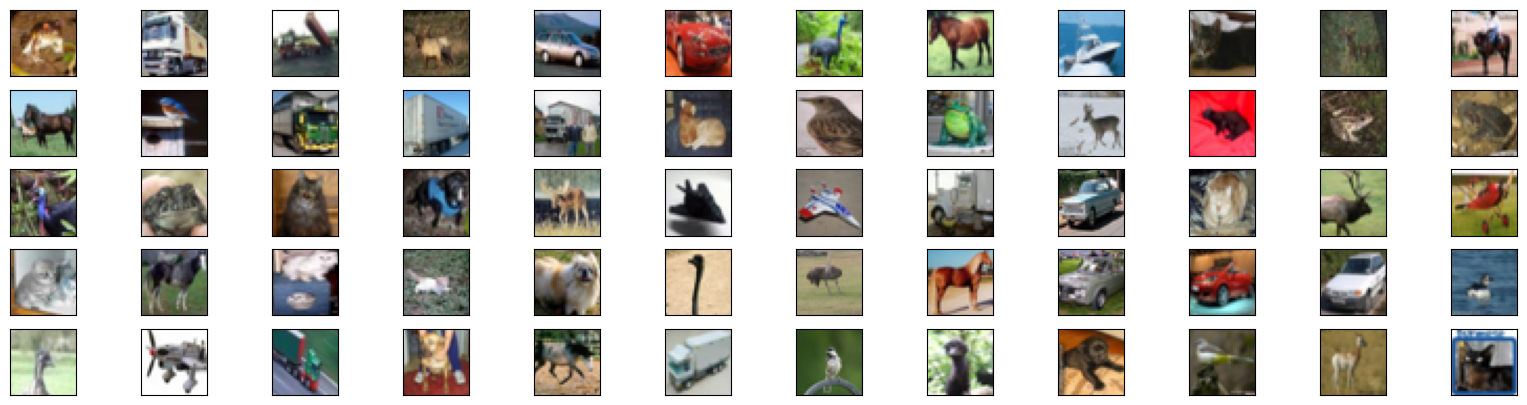

In [3]:
fig = plt.figure(figsize=(20, 5))
for i in range(60):
  ax = fig.add_subplot(5, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [4]:
X_train.shape

(50000, 32, 32, 3)

## **3. Data Pre-processing (Rescaling & One-Hot Encoding)**

In [5]:
# Normalize the pixel value in between 0 to 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# One-Hot Encoding
from keras.utils import to_categorical

y__cat_train = to_categorical(y_train, 10)
y__cat_test = to_categorical(y_test, 10)

## **4. Define Model Architecture**

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [14]:
model = Sequential()


# 1st Convolution Block
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu', padding = 'same'))  # 1st Convolution Layer
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))   # 2nd Convolution Layer
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))   # Pooling Layer
model.add(Dropout(0.2))

# 2nd Convolution Block
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))  # 3rd Convolution Layer
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))   # 4th Convolution Layer
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# 3rd Convolution Block
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))  # 5th Convolution Layer
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))   # 6th Convolution Layer
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))   # 7th Convolution Layer
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.6))


# Flattening Layer
model.add(Flatten())


# Fully Connected layer
# Adding the first hidden layer
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.7))

# Adding the second hidden layer
#model.add(Dense(64, activation = 'relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.4))

# Adding the Output layer
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

## **5. Compile the Model**

In [16]:
opt =    tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9)

In [17]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer= 'adam')

## **6. Model Training**

In [18]:
history = model.fit(X_train, y__cat_train, batch_size= 100, epochs = 80, validation_split=0.2)

Epoch 1/80
400/400 [==============================] - 18s 29ms/step - loss: 2.2458 - accuracy: 0.1499 - val_loss: 2.7248 - val_accuracy: 0.1062
Epoch 2/80
400/400 [==============================] - 11s 28ms/step - loss: 1.9906 - accuracy: 0.2132 - val_loss: 1.6852 - val_accuracy: 0.3385
Epoch 3/80
400/400 [==============================] - 11s 28ms/step - loss: 1.8569 - accuracy: 0.2665 - val_loss: 1.6060 - val_accuracy: 0.3722
Epoch 4/80
400/400 [==============================] - 11s 28ms/step - loss: 1.7419 - accuracy: 0.3116 - val_loss: 1.5234 - val_accuracy: 0.4324
Epoch 5/80
400/400 [==============================] - 11s 28ms/step - loss: 1.6345 - accuracy: 0.3638 - val_loss: 1.3816 - val_accuracy: 0.4956
Epoch 6/80
400/400 [==============================] - 11s 28ms/step - loss: 1.5312 - accuracy: 0.4142 - val_loss: 1.1715 - val_accuracy: 0.5755
Epoch 7/80
400/400 [==============================] - 11s 28ms/step - loss: 1.4185 - accuracy: 0.4643 - val_loss: 1.1780 - val_accuracy:

## **7. Model Evaluation**

In [20]:
score = model.evaluate(X_test, y__cat_test)
print('Test Loss: ', score[0])
print('Test accuracy: ', score[1]*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.6737 - accuracy: 0.8587
Test Loss:  0.6736660599708557
Test accuracy:  85.86999773979187


## **8. Evaluation Graph**

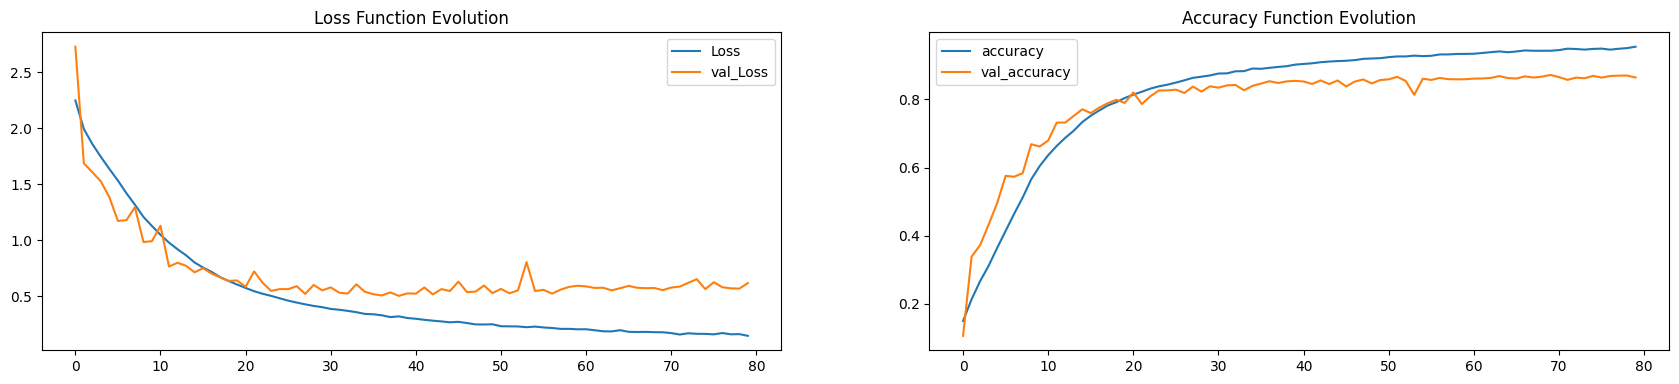

In [21]:
plt.figure(figsize=(21, 19))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

## **9. Plot the Confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
# Making Prediction with test data and calculating confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

313/313 [==============================] - 1s 3ms/step


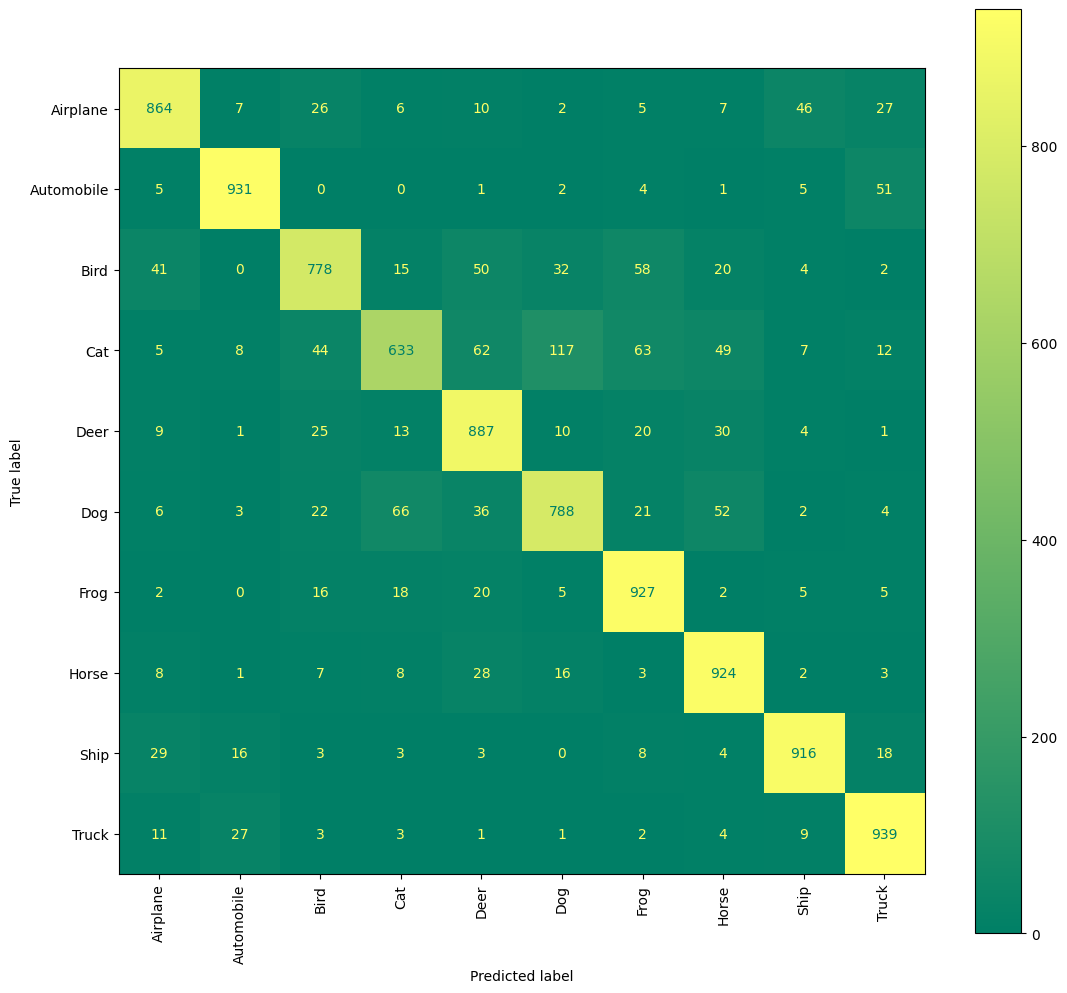

In [24]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(13, 12))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## **10. Save the Model**

In [25]:
model.save('/content/drive/MyDrive/AI Learning Materials/Best-CNN-Model-for-CIFAR-10.hdf5')